In [1]:
import pandas as pd
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np
import datetime as dt

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop(columns = ['Payroll Number','Last Name', 'First Name','Mid Init','Total Other Pay','Regular Gross Paid','Title Description'], inplace = True)

In [4]:
zero_dict = {'CEASED': np.nan,
            'ON LEAVE': np.nan,
            'SEASONAL': np.nan,
            'ON SEPARATION LEAVE': np.nan}

df['Leave Status as of June 30'].replace(zero_dict, inplace = True)

df.dropna(inplace = True)

In [5]:
df['start_year'] = df['Agency Start Date'].apply(lambda x: int(x[6:]))
df['years_with_city'] = df[['Fiscal Year']].sub(df['start_year'], axis=0)
df.drop(columns = ['Agency Start Date','Leave Status as of June 30'], inplace = True)

In [6]:
na_dict= {'OTHER' : np.nan,
'RICHMOND' : np.nan,
'WESTCHESTER' : np.nan,
'ULSTER' : np.nan,
'SULLIVAN' : np.nan,
'DELAWARE' : np.nan,
'PUTNAM' : np.nan,
'NASSAU' : np.nan,
'SCHOHARIE' : np.nan,
'Richmond' : np.nan,
'DUTCHESS' : np.nan,
'ALBANY' : np.nan,
'GREENE' : np.nan,
'WASHINGTON DC' : np.nan,
'ORANGE' : np.nan }
df['Work Location Borough'].replace(na_dict, inplace = True)
df.dropna(inplace = True)

In [7]:
# clean up work location
df.loc[df['Work Location Borough'] =='MANHATTAN', 'Work Location Borough']= 'Manhattan'
df.loc[df['Work Location Borough'] =='QUEENS', 'Work Location Borough']= 'Queens'
df.loc[df['Work Location Borough'] =='BROOKLYN', 'Work Location Borough']= 'Brooklyn'
df.loc[df['Work Location Borough'] =='BRONX', 'Work Location Borough']= 'Bronx'

In [8]:
df.loc[df['Work Location Borough']=='Bronx','Work Location Borough']=1
df.loc[df['Work Location Borough']=='Brooklyn','Work Location Borough']=2
df.loc[df['Work Location Borough']=='Manhattan','Work Location Borough']=3
df.loc[df['Work Location Borough']=='Queens','Work Location Borough']=4

In [9]:
df['Pay Basis'].value_counts()

per Annum          1380931
per Day             531586
per Hour            416422
Prorated Annual       9054
Name: Pay Basis, dtype: int64

In [10]:
pay_dict= {'per Day' : np.nan,
'per Hour' : np.nan,
'Prorated Annual' : np.nan}
df['Pay Basis'].replace(pay_dict, inplace = True)
df.dropna(inplace = True)

In [11]:
df.loc[df['years_with_city']<0]

,Fiscal Year,Agency Name,Work Location Borough,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,start_year,years_with_city
762964,2015,DEPT OF ED PARA PROFESSIONALS,3,27617.0,per Annum,0.0,0.0,0.0,9999,-7984
764677,2015,DEPT OF ED PARA PROFESSIONALS,3,33329.0,per Annum,0.0,0.0,0.0,9999,-7984
764906,2015,DEPT OF ED PARA PROFESSIONALS,3,37966.0,per Annum,0.0,0.0,0.0,9999,-7984
767672,2015,DEPT OF ED PARA PROFESSIONALS,3,35915.0,per Annum,0.0,0.0,0.0,9999,-7984
768055,2015,DEPT OF ED PARA PROFESSIONALS,3,35915.0,per Annum,0.0,0.0,0.0,9999,-7984
...,...,...,...,...,...,...,...,...,...,...
3021027,2019,DEPT OF ED PARA PROFESSIONALS,3,33209.0,per Annum,0.0,0.0,0.0,9999,-7980
3022080,2019,DEPT OF ED PARA PROFESSIONALS,3,33629.0,per Annum,0.0,0.0,0.0,9999,-7980
3022427,2019,DEPT OF ED PARA PROFESSIONALS,3,33209.0,per Annum,0.0,0.0,0.0,9999,-7980
3022495,2019,DEPT OF ED PARA PROFESSIONALS,3,33209.0,per Annum,0.0,0.0,0.0,9999,-7980


In [12]:
df.loc[df['Regular Hours']>3000, 'Regular Hours'] = np.nan
df.dropna(inplace = True)

In [13]:
df.loc[df['years_with_city']<0, 'years_with_city'] = np.nan
df.loc[df['years_with_city']>100, 'years_with_city'] = np.nan
df.dropna(inplace = True)

In [14]:
df.loc[df['Base Salary']>330000]

,Fiscal Year,Agency Name,Work Location Borough,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,start_year,years_with_city
540115,2016,OFFICE OF THE COMPTROLLER,3,350000.0,per Annum,1830.0,0.0,0.0,2014,2.0
2122095,2017,OFFICE OF THE COMPTROLLER,3,350000.0,per Annum,1825.0,0.0,0.0,2014,3.0
2389485,2018,DEPT OF ED PEDAGOGICAL,3,345000.0,per Annum,0.0,0.0,0.0,2018,0.0
2743662,2019,OFFICE OF THE COMPTROLLER,3,350000.0,per Annum,1825.0,0.0,0.0,2012,7.0
2892771,2019,DEPT OF ED PEDAGOGICAL,3,352763.0,per Annum,0.0,0.0,0.0,2018,1.0


In [44]:
df.loc[df['Base Salary']<20000, 'Base Salary'] = np.nan
df.loc[df['Base Salary']>330000, 'Base Salary'] = np.nan
df.dropna(inplace = True)

In [16]:
df.loc[df['Fiscal Year']==2014, 'Fiscal Year'] = np.nan
df.dropna(inplace = True)

In [17]:
# df['Fiscal Year'].astype('int64', copy=False)
df['Fiscal Year'] = df['Fiscal Year'].astype(np.int64)

In [18]:
df['Fiscal Year'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Salary by Fiscal Year')

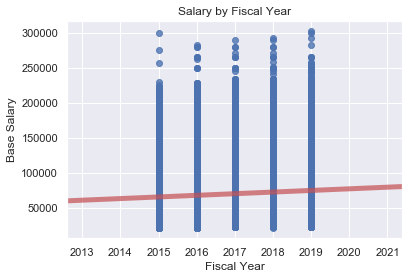

In [45]:
sns.regplot(x=df['Fiscal Year'], y=df['Base Salary'],line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('Salary by Fiscal Year')

Text(0.5, 1.0, 'Salary by Years with City')

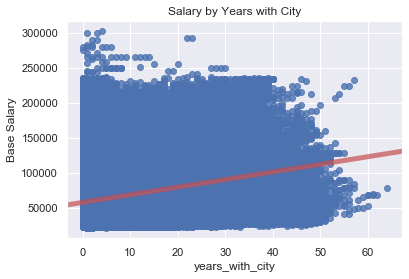

In [46]:
sns.regplot(x=df['years_with_city'], y=df['Base Salary'],line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('Salary by Years with City')

In [ ]:
pd.DataFrame.hist(df,figsize=(12,12))

In [ ]:
# df.groupby('Fiscal Year')['Base Salary'].mean().plot(kind='bar')
# plt.ylabel('Average Base Salary')

# plt.title('Average NYC City Employee Salary')

In [34]:
df['Agency Name'].value_counts().nsmallest(50).sum()

621

In [35]:
df.loc[df['Agency Name'].str.contains("COMMUNITY BOARD"), 'Agency Name'] = np.nan
df.dropna(inplace = True)

In [36]:
df[df['Agency Name'].str.contains("COMMUNITY BOARD")]

,Fiscal Year,Agency Name,Work Location Borough,Base Salary,Pay Basis,Regular Hours,OT Hours,Total OT Paid,start_year,years_with_city


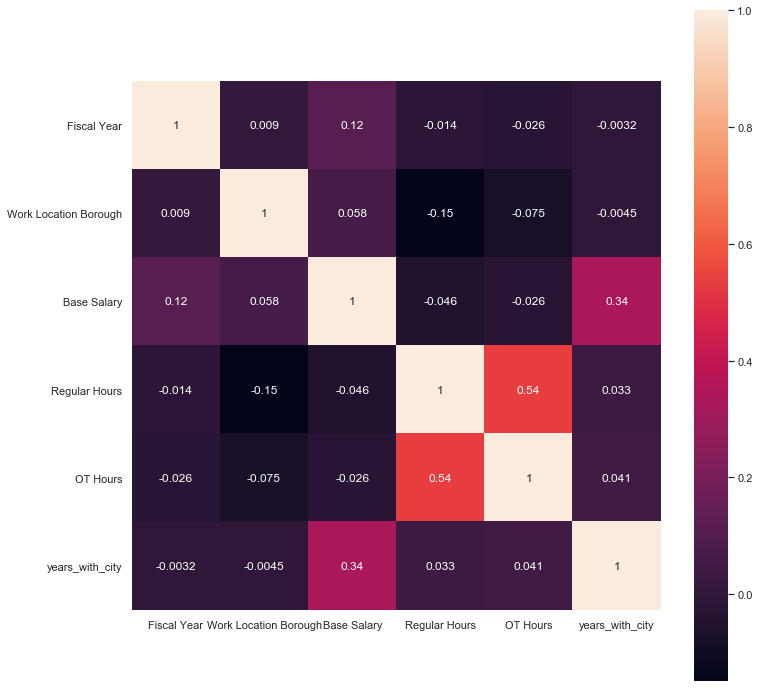

In [39]:
corrmat = df[['Fiscal Year','Agency Name','Work Location Borough','Base Salary', 
              'Regular Hours', 'OT Hours','years_with_city']].corr()
sns.set(font_scale=1)
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
plt.tight_layout()
sns.heatmap(corrmat,square=True,annot=True, cbar = True)

In [ ]:
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.replace('#','') for x in df.columns]
df.columns = [x.replace("'", '') for x in df.columns]
df.columns = [x.replace('.','') for x in df.columns]
df.columns = [x.replace('(','') for x in df.columns]
df.columns = [x.replace(')','') for x in df.columns]
df.columns = [x.replace('&','_') for x in df.columns]
df.columns = [x.replace('-','_') for x in df.columns]
df.columns = [x.replace('/','_') for x in df.columns]

In [ ]:
agency_dummies = pd.get_dummies(df['Agency_Name'], prefix='agency', drop_first=True)
borough_dummies = pd.get_dummies(df['Work_Location_Borough'], prefix='borough', drop_first=True)
df = pd.concat([df, agency_dummies], axis=1)

In [ ]:
df.drop(columns = ['Agency_Name','start_year','Pay_Basis'], axis=1, inplace=True)
df.shape

In [ ]:
# creating features column without the dependent variable

features = list(df.columns)
features.remove('Base_Salary')

def listToString(s):
    # initialize an empty string
    str1 = " "
    # return string
    return (str1.join(s))

new_feature = listToString(features)
new_features = new_feature.replace(' ', ' + ')

features2 = 'Base_Salary ~ ' + new_features
features2

In [ ]:
from sklearn.preprocessing import StandardScaler

# scale continuous variables
subset =['Regular_Hours', 'OT_Hours', 'Total_OT_Paid', 'years_with_city']
scaler = StandardScaler()
subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)
subset_scaled

In [ ]:
df.describe()

In [ ]:
# create a scaled features columns
featuresSC = list(df.columns)
featuresSC.remove('Base_Salary')
featuresSC.remove('Regular_Hours')
featuresSC.remove('OT_Hours')
featuresSC.remove('Total_OT_Paid')
featuresSC.remove('years_with_city')
new_featureSC = listToString(featuresSC)
new_featuresSC = new_featureSC.replace(' ', ' + ')
featuresScaled = 'Base_Salary ~ ' + new_featuresSC  
featuresScaled

In [ ]:
# from statsmodels.formula.api import ols
# mlr_model=ols(formula=features2, data=df).fit()
# mlr_model.summary()